In [1]:
import pandas as pd
import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('./data/airbnb-listings-extract.csv', sep=";" )
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

**Fase: 1**
See realiza un análisis previo de los datos. Se evaluan las features basado en la relevancia que pudiesen tener sobre el Precio, en la definicion **clean_df** se describe, se decide para este análisis las siguientes :



***Información sobre la Propiedad:***----- ***Información Financiera:***---------    ***Restricciones:***---------   ***Disponibilidad:***---------     ***Información sobre las Reseñas:***-------  ***Datos Geográficos:***

    *Property Type                   *Price (objetivo)          *Minimum Nights  *Availability 30     *Number of Reviews             *Latitude
    *Room Type                       *Weekly Price              *Maximum Nights  *Availability 60     *Review Scores Rating          *Longitude 
    *Accommodates                    *Monthly Price                              *Availability 90     *Review Scores Accuracy        *City
    *Bathrooms                       *Security Deposit                           *Availability 365    *Cancellation Policy           *State
    *Bedrooms                        *Cleaning Fee                                                    *Host Listings Count           *Zip code
    *Beds                            *Guests Included                                                 *Review Scores Cleanliness     *Neighbourhood Cleansed
    *Bed Type                        *Extra People                                                    *Review Scores Checkin 
    *Square Feet                                                                                      *Review Scores Communication
                                                                                                      *Review Scores Location
                                                                                                      *Review Scores Value
                                                                                                      *Reviews per Month
                                                                                                      *Calculated host listings count
                                                                                                      


In [3]:
df=pd.read_csv('./data/airbnb-listings-extract.csv', sep=";" )
df=preprocessing.structure_DF(df)
df=preprocessing.clean_df(df)
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=0)
train.to_csv('./data/airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/airbnb_test.csv', sep=';', decimal='.', index=False)

In [4]:
df_train=pd.read_csv('./data/airbnb_train.csv', sep=";",decimal='.' )
df.shape

(14780, 39)

<Axes: >

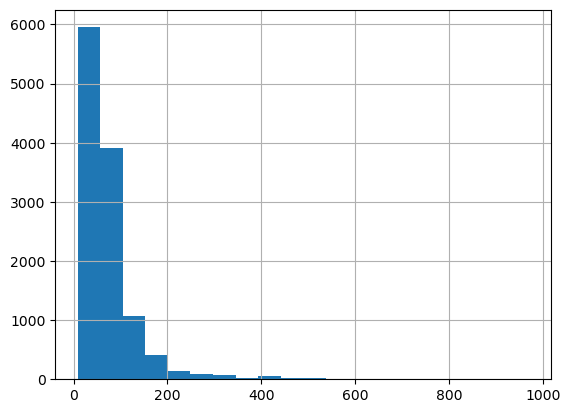

In [5]:
df_train.Price.hist(bins=20)

In [6]:
high_price_df = df_train[df_train['Price'] > 600]
low_price_df= df_train[df_train['Price'] <= 600]
high_price_df[['Price', 'Accommodates','Cleaning Fee','Bathrooms','Bedrooms','Beds','Calculated host listings count']].describe()


,Price,Accommodates,Cleaning Fee,Bathrooms,Bedrooms,Beds,Calculated host listings count
count,28.000000,28.000000,12.000000,28.000000,28.000000,28.000000,28.000000
mean,740.285714,6.714286,229.250000,2.892857,3.321429,4.357143,16.321429
std,93.051502,5.017430,140.737102,2.183088,2.762897,4.227023,30.308358
min,610.000000,2.000000,50.000000,1.000000,1.000000,1.000000,1.000000
25%,685.750000,2.000000,127.500000,1.000000,1.000000,1.000000,1.000000
50%,715.500000,7.000000,241.500000,2.750000,2.500000,4.000000,1.000000
75%,769.000000,10.000000,312.500000,4.250000,5.000000,5.250000,10.500000
max,969.000000,16.000000,500.000000,7.500000,10.000000,16.000000,129.000000


In [7]:
low_price_df[['Price', 'Accommodates','Cleaning Fee','Bathrooms','Bedrooms','Beds','Calculated host listings count']].describe()

,Price,Accommodates,Cleaning Fee,Bathrooms,Bedrooms,Beds,Calculated host listings count
count,11781.000000,11781.000000,6955.000000,11738.000000,11761.000000,11745.000000,11777.000000
mean,72.128342,3.265427,31.514019,1.280031,1.337896,2.041039,9.607880
std,63.748321,2.070346,27.811280,0.648041,0.887517,1.602648,23.790971
min,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,34.000000,2.000000,15.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,3.000000,25.000000,1.000000,1.000000,2.000000,2.000000
75%,86.000000,4.000000,40.000000,1.000000,2.000000,2.000000,5.000000
max,600.000000,16.000000,350.000000,8.000000,10.000000,16.000000,145.000000


In [8]:
original_mean = df_train['Price'].mean()
filtered_mean = df_train[df_train['Price'] <= 600]['Price'].mean()

print(f"Media original: {original_mean}")
print(f"Media sin valores > 600: {filtered_mean}")

Media original: 73.71259209077822
Media sin valores > 600: 72.1283422459893


Veo que tengo muy pocas observaciones de Price mayor a 600 euros (28), pero la diferencia entre la media total del set de datos y la media del set mayores a 600 euros tienen una diferencia de un 2.4% es un cambio menor en el contexto de los datos, por lo que para este estudio no conozco si los altos valores se corresponden con la data o si son errores, de modo que no voy a eliminarlos teniendo encuenta lo siguiente:

1-Bajo impacto en la media
2-Pérdida de información

**Evaluar la calidad de las observaciones, mostrando las columnas con registros NaN y su frequencia.**

In [9]:
hf = df_train.isnull().sum()
columns_with_null= hf[hf > 0]
columns_with_null

Host Listings Count                   3
City                                  4
State                               119
Zipcode                             398
Bathrooms                            44
Bedrooms                             20
Beds                                 37
Square Feet                       11350
Price                                15
Weekly Price                       8943
Monthly Price                      8955
Security Deposit                   6772
Cleaning Fee                       4850
Review Scores Rating               2661
Review Scores Accuracy             2681
Review Scores Cleanliness          2676
Review Scores Checkin              2688
Review Scores Communication        2677
Review Scores Location             2691
Review Scores Value                2692
Calculated host listings count        4
Reviews per Month                  2539
dtype: int64

**Se realiza un proceso de limpieza de las Columnas(Features) que tienen mas del 50% de sus observaciones constituidas NaN**

In [10]:
clean_df=preprocessing.remove_features_NaN(df_train)

In [11]:
clean_df.shape

(11824, 35)

In [12]:
hf = clean_df.isnull().sum()
columns_with_null= hf[hf > 0]
columns_with_null

Host Listings Count                  3
City                                 4
State                              119
Zipcode                            398
Bathrooms                           44
Bedrooms                            20
Beds                                37
Price                               15
Cleaning Fee                      4850
Review Scores Rating              2661
Review Scores Accuracy            2681
Review Scores Cleanliness         2676
Review Scores Checkin             2688
Review Scores Communication       2677
Review Scores Location            2691
Review Scores Value               2692
Calculated host listings count       4
Reviews per Month                 2539
dtype: int64

**Se decide eliminar las 15 observaciones del Precio que se encuentran con NaN**

In [13]:
clean_df=clean_df.dropna(subset=['Price'])

In [14]:
hf = clean_df.isnull().sum()
columns_with_null= hf[hf > 0]
columns_with_null

Host Listings Count                  3
City                                 4
State                              116
Zipcode                            397
Bathrooms                           43
Bedrooms                            20
Beds                                36
Cleaning Fee                      4842
Review Scores Rating              2654
Review Scores Accuracy            2674
Review Scores Cleanliness         2669
Review Scores Checkin             2681
Review Scores Communication       2670
Review Scores Location            2684
Review Scores Value               2685
Calculated host listings count       4
Reviews per Month                 2532
dtype: int64

In [15]:
df_numeric = clean_df.select_dtypes(include=['float', 'int'])
correlation_matrix = df_numeric.corr()
price_correlation = correlation_matrix['Price'].sort_values(ascending=False)
price_correlation

Price                             1.000000
Cleaning Fee                      0.674445
Accommodates                      0.528380
Bedrooms                          0.492316
Beds                              0.438198
Bathrooms                         0.379419
Guests Included                   0.296850
Host Listings Count               0.229585
Calculated host listings count    0.223787
Availability 30                   0.106314
Extra People                      0.104672
Review Scores Location            0.102186
Review Scores Cleanliness         0.078627
Availability 60                   0.064655
Review Scores Rating              0.061904
Review Scores Accuracy            0.059643
Availability 365                  0.057354
Availability 90                   0.032864
Minimum Nights                    0.029632
Review Scores Value               0.015110
Review Scores Communication       0.005208
Longitude                         0.004976
Maximum Nights                    0.000851
Review Scor

In [16]:
hf = clean_df.isnull().sum()
columns_with_null= hf[hf > 0]
columns_with_null


Host Listings Count                  3
City                                 4
State                              116
Zipcode                            397
Bathrooms                           43
Bedrooms                            20
Beds                                36
Cleaning Fee                      4842
Review Scores Rating              2654
Review Scores Accuracy            2674
Review Scores Cleanliness         2669
Review Scores Checkin             2681
Review Scores Communication       2670
Review Scores Location            2684
Review Scores Value               2685
Calculated host listings count       4
Reviews per Month                 2532
dtype: int64

**Aún hay Features de relevancia correlacional con el Precio que tienen una cantidad de observaciones considerables de NaN, se decide emplear para las variables númericas las imputación de valores usando el modelo de KNNImputer una técnica basada en los K-vecinos más cercanos, bajo la premisa que instancias similares tienden a tener etiquetas similares**

In [17]:
imputer_df=preprocessing.imputer_data_numeric(clean_df)

In [18]:
hf = imputer_df.isnull().sum()
columns_with_null= hf[hf > 0]
columns_with_null

City         4
State      116
Zipcode    397
dtype: int64

In [19]:
imputer_df.shape

(11809, 35)

**Se decide las Features Categoricas aplicar un encoding en dependencia aal tipo Nominal o Ordinal dado que los tipos de encoding están diseñados para tratar estos datos de manera diferente**

In [20]:
df_train=preprocessing.encoding_categorical_column(imputer_df)

In [21]:
hf = df_train.isnull().sum()
columns_with_null= hf[hf > 0]
columns_with_null

Series([], dtype: int64)

In [22]:
df_train.columns

Index(['Host Listings Count', 'Neighbourhood Cleansed', 'City', 'State',
       'Zipcode', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Price',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')

k=5: R2 mean=0.5998771012241406
k=10: R2 mean=0.6169683469345244
k=all: R2 mean=0.6319315978372002


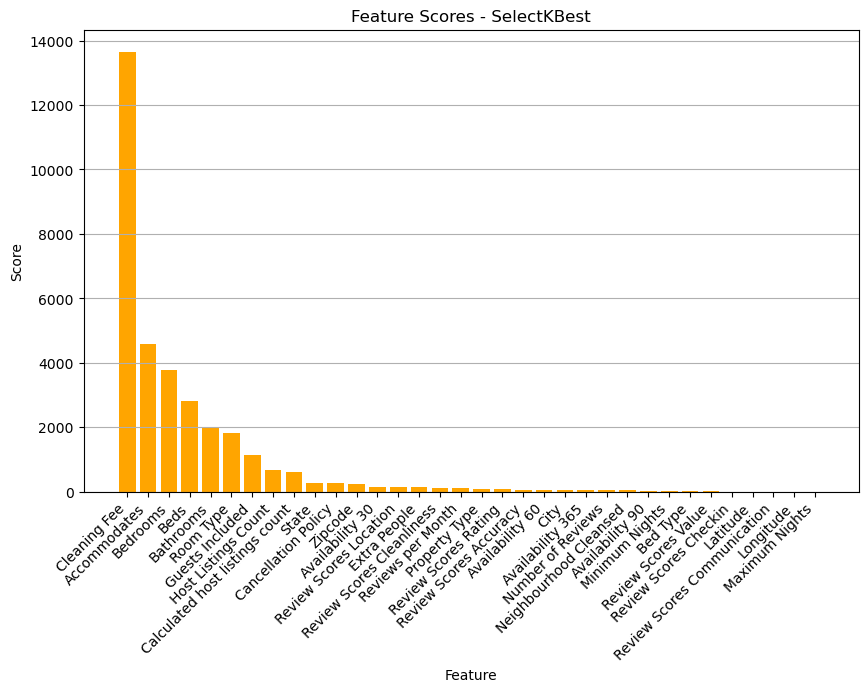

In [23]:
features_SKBEST=preprocessing.features_impact_SKBEST(df_train)

Fitting 8 folds for each of 7 candidates, totalling 56 fits
best mean cross-validation score: 0.751
best parameters: {'estimator__max_depth': 9}


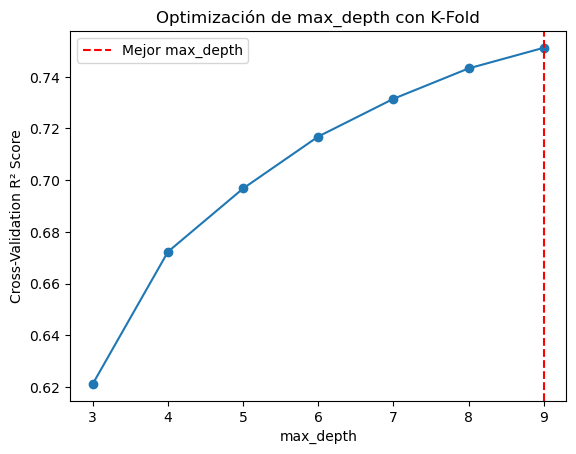

Train R^2:  0.8918825004341904
Test R^2:  0.7640440107867617
MAE Train:  14.92068221387512
MAE Test:  18.08405706390806
RMSE Train:  23.558191575227955
RMSE Test:  34.740129488843536


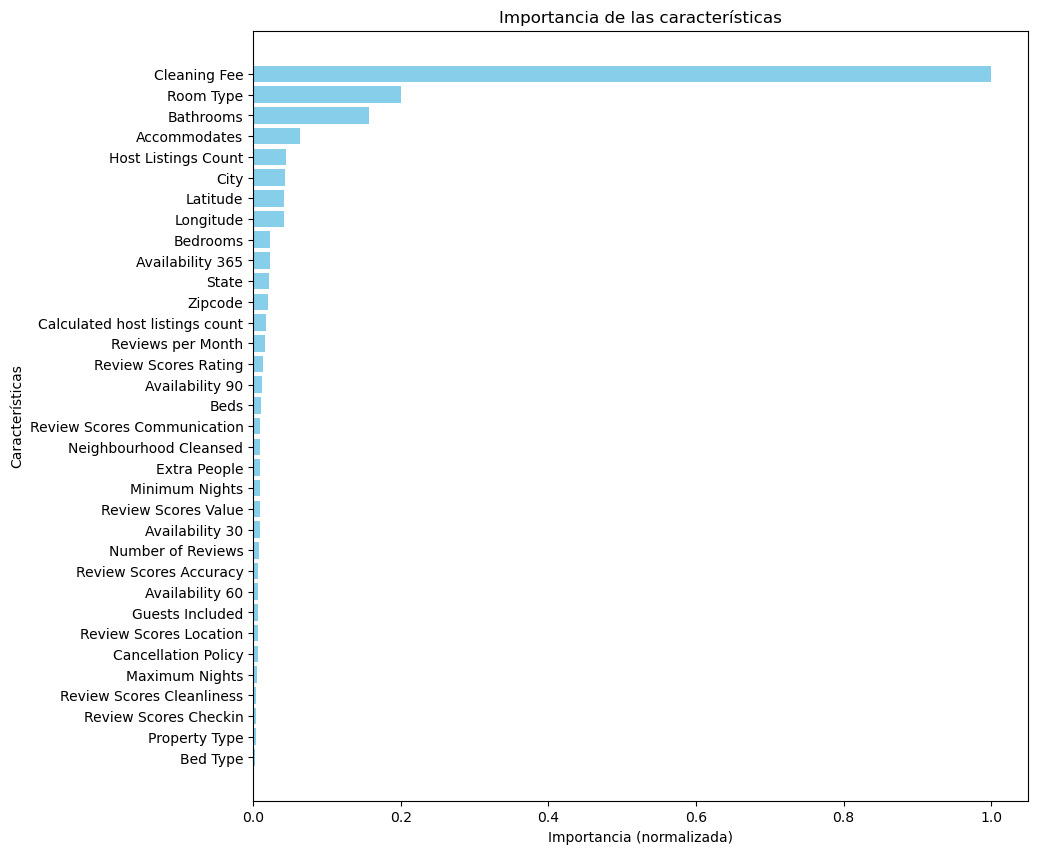

In [24]:
features_FOREST=preprocessing.BagginReg(df_train)

La diferencia entre Train R² y Test R² indica una ligera tendencia al sobreajuste, pero no es severo.El modelo tiene un rendimiento decente en ambos conjuntos de datos, no es capaz de generalizar


MSE ElasticNet (train): 1839.9128
R² ElasticNet (train): 0.6416
MSE ElasticNet (test): 1891.4532
R² ElasticNet (test): 0.6302
Best alpha: 0.08302175681319744
Best l1_ratio: 0.9


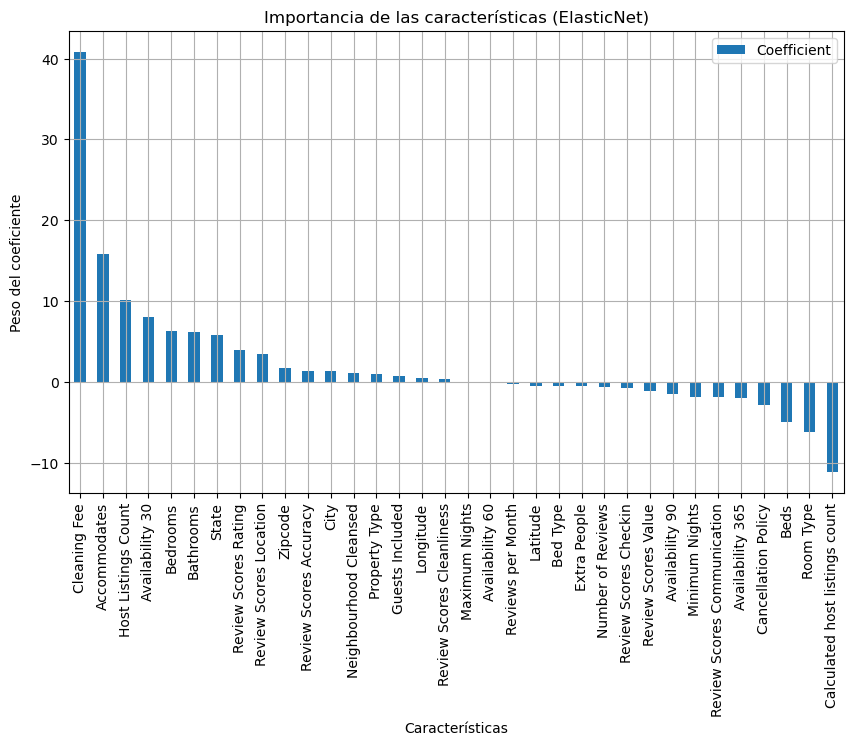

In [25]:
preprocessing.features_impact_ELASTICNET(df_train)

La diferencia entre el MSE de entrenamiento y de prueba es pequeña. Esto es una buena señal, ya que indica que el modelo no está sobreajustando excesivamente y tiene un rendimiento consistente en ambos conjuntos de datos.Generaliza bien pero el modelo no es capaz de explicar completamente la varianza de los datos, hay espacio de mejora. LA diferencia + - 42 euros

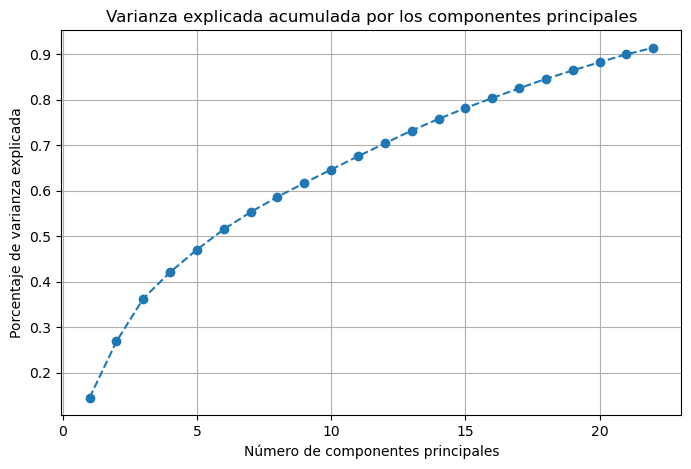

Correlaciones con el precio:
PC_2     0.569790
PC_21    0.257402
PC_7     0.243628
PC_1     0.183161
PC_5     0.144062
PC_22    0.080482
PC_19    0.063743
PC_8     0.061283
PC_9     0.053510
PC_4     0.044744
PC_10    0.031533
PC_15    0.010486
PC_12    0.003028
PC_16   -0.012159
PC_11   -0.027155
PC_6    -0.030928
PC_17   -0.047561
PC_14   -0.095520
PC_20   -0.099425
PC_18   -0.103751
PC_13   -0.153790
PC_3    -0.193052
Name: Price, dtype: float64


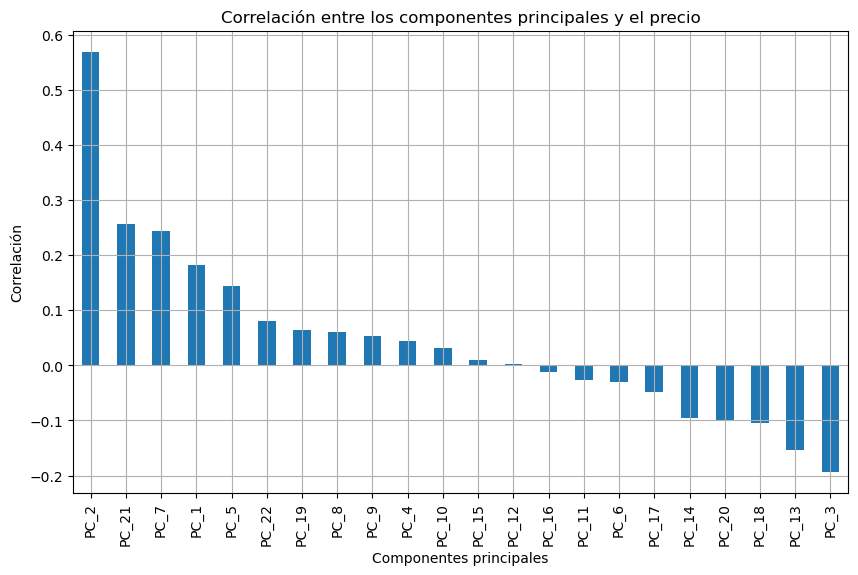

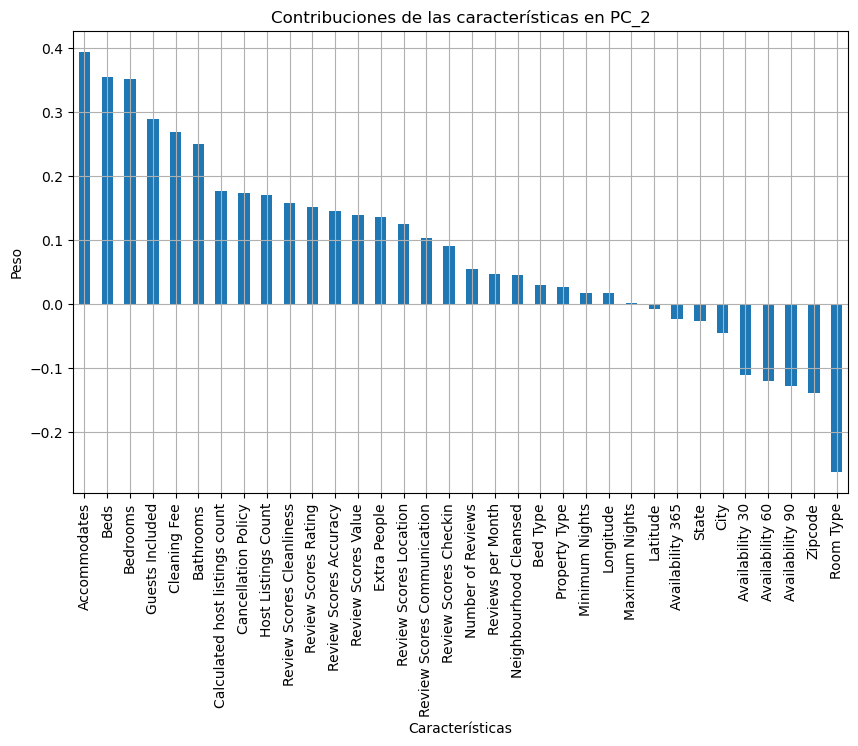

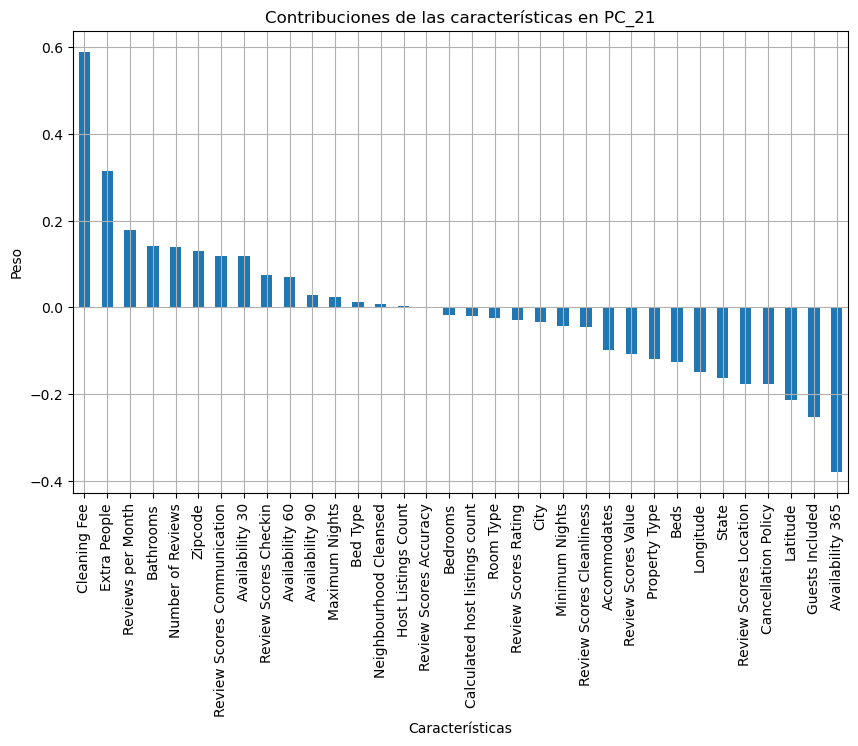

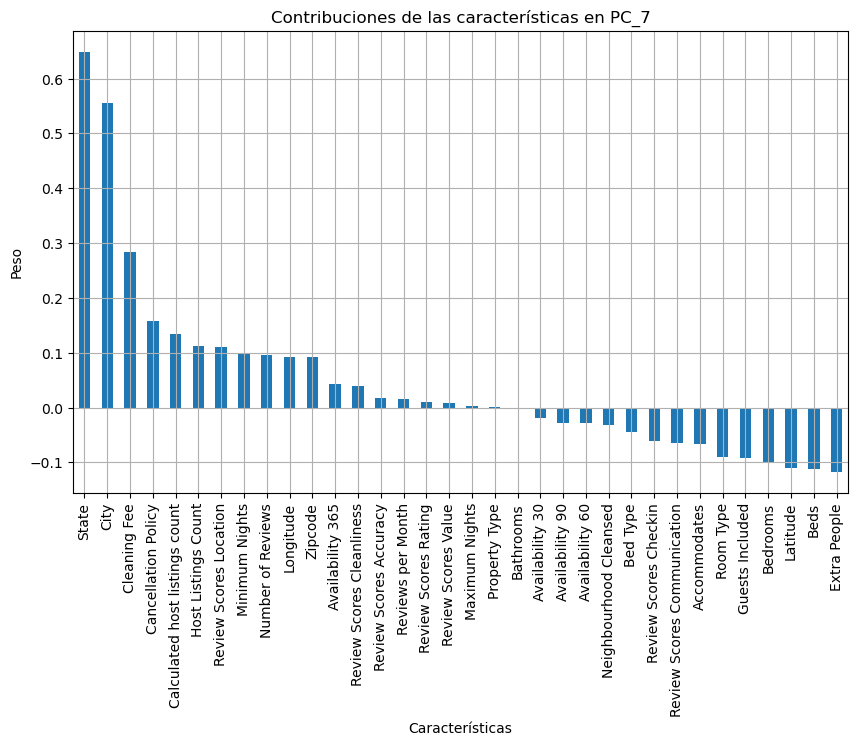

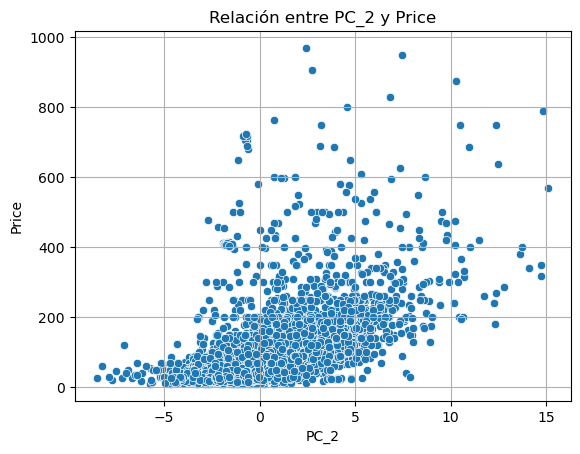

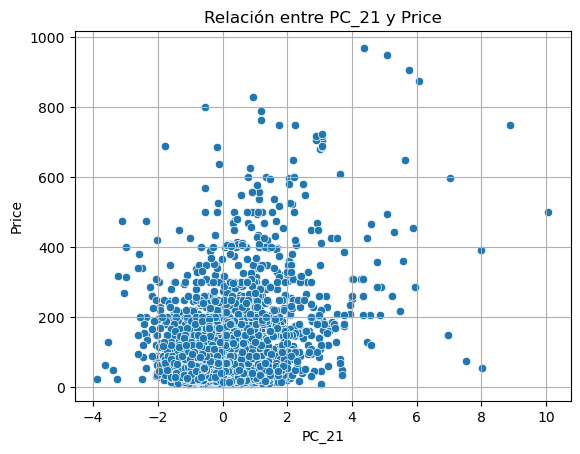

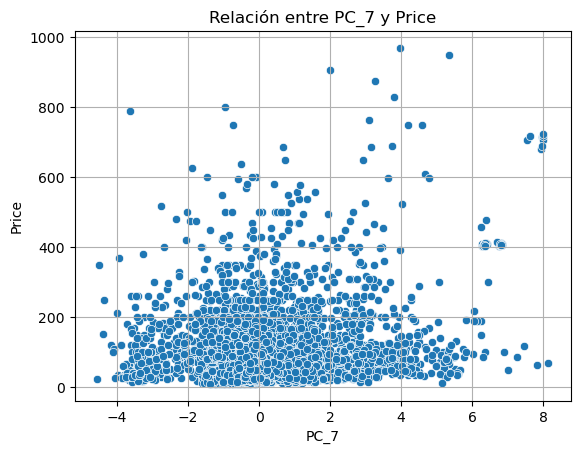

In [26]:
preprocessing.features_PCA_full_analysis(df_train)

PC 2 Captura la relación más fuerte con el precio 
Igual se analizan los componentes PC 21 y PC 7 y se visualiza su correlacion con el precio, en PC_2 mucho mas fuerte. 

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}


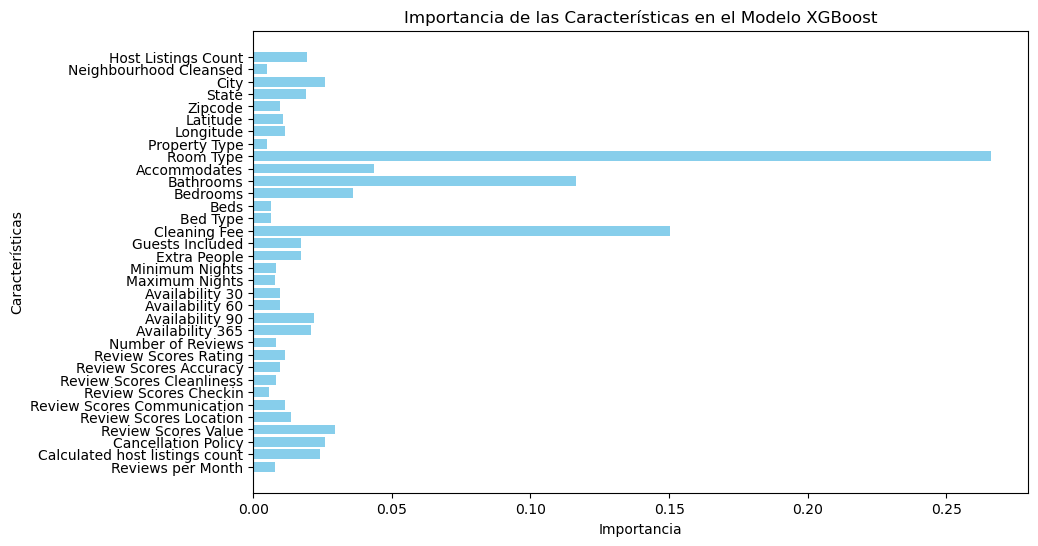

In [27]:
preprocessing.features_impact_XGBRegresor(df_train)

In [28]:
df_train=preprocessing.filtrar_columnas(df_train,['Cleaning Fee','Accommodates','Room Type','Bathrooms','Bedrooms','Beds','Host Listings Count','Calculated host listings count','Guests Included','Zipcode','Price','Cancellation Policy','City'])

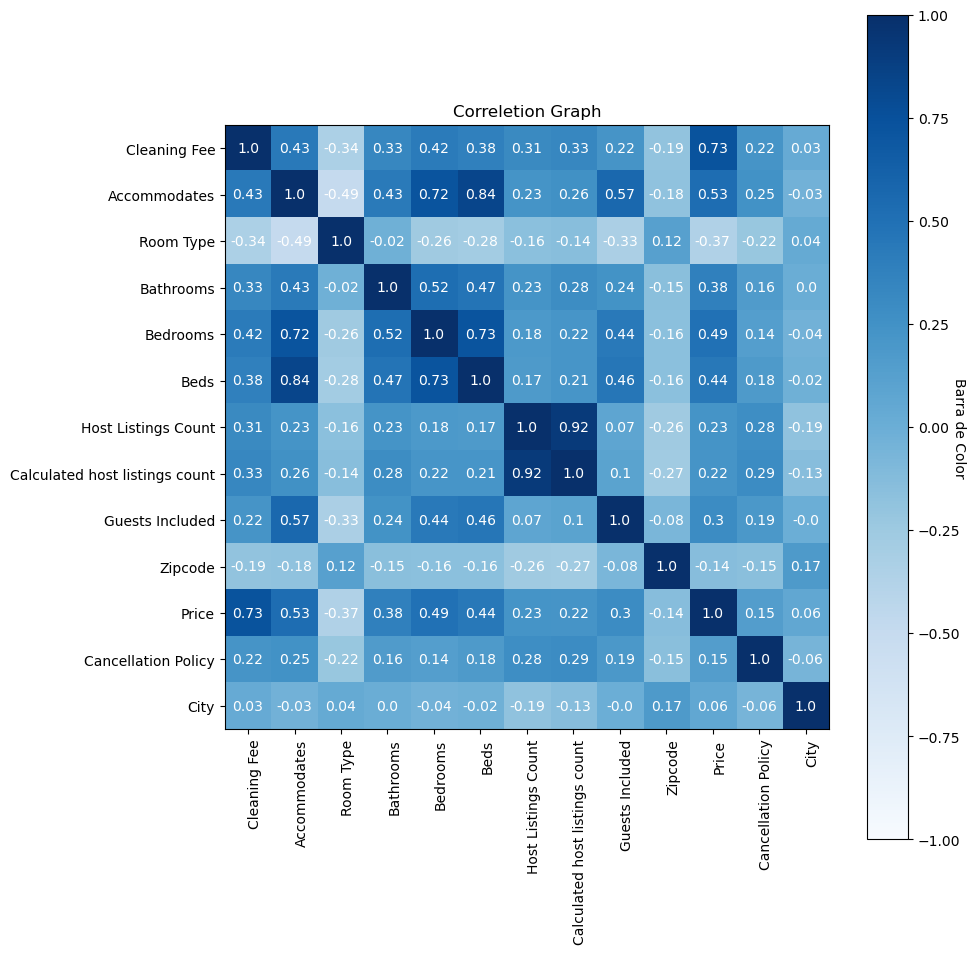

In [29]:
preprocessing.grafik_heatmap_cor(df_train.corr())

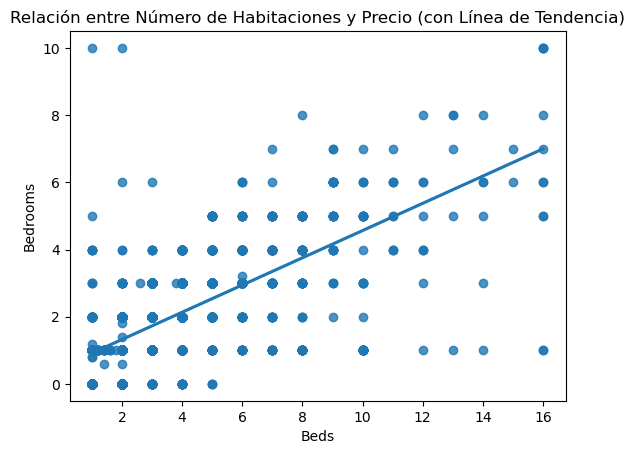

In [30]:
preprocessing.relationship(df_train[['Beds','Bedrooms']],'Bedrooms','Beds')

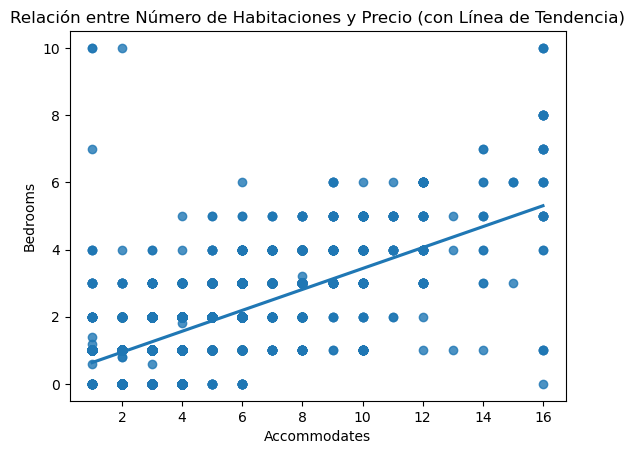

In [31]:
preprocessing.relationship(df_train[['Accommodates','Bedrooms']],'Bedrooms','Accommodates')

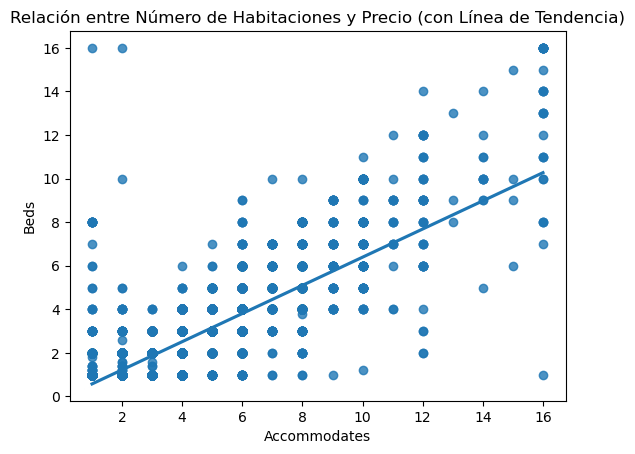

In [32]:
preprocessing.relationship(df_train[['Accommodates','Beds']],'Beds','Accommodates')

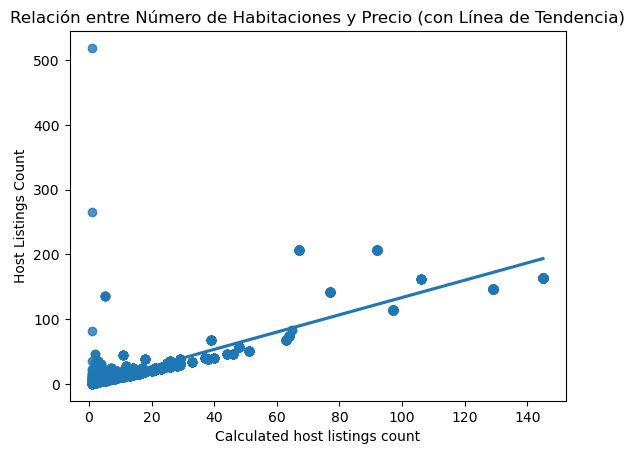

In [34]:
preprocessing.relationship(df_train[['Host Listings Count','Calculated host listings count']],'Host Listings Count','Calculated host listings count')

Existe una correlacion fuerte entre Accomodates y Bedrooms (.72) , una correlacion fuerte entre Bed y Bedrooms (.73) y entre Accommodates y Beds (.84), En casi todos los modelos de Impacto de Features Accomodates y Bedrooms explicaban mejor la varianza, por lo que debemos observar como puede incidir esto en los resultados del modelo. 

In [ ]:
df_train[['Zipcode', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms',
       'Cleaning Fee','Host Listings Count','Guests Included','Cancellation Policy']].describe()

,Zipcode,Room Type,Accommodates,Bathrooms,Bedrooms,Cleaning Fee,Calculated host listings count,Guests Included,Cancellation Policy
count,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000
mean,273.007960,0.405877,3.273605,1.283817,1.342231,29.566619,9.621001,1.580574,2.165552
std,72.026213,0.518267,2.088509,0.659649,0.901011,27.479130,23.805602,1.153438,1.701699
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,261.000000,0.000000,2.000000,1.000000,1.000000,15.000000,1.000000,1.000000,0.000000
50%,268.000000,0.000000,3.000000,1.000000,1.000000,23.000000,2.000000,1.000000,2.000000
75%,277.000000,1.000000,4.000000,1.000000,2.000000,34.000000,5.000000,2.000000,4.000000
max,531.000000,2.000000,16.000000,8.000000,10.000000,500.000000,145.000000,16.000000,7.000000


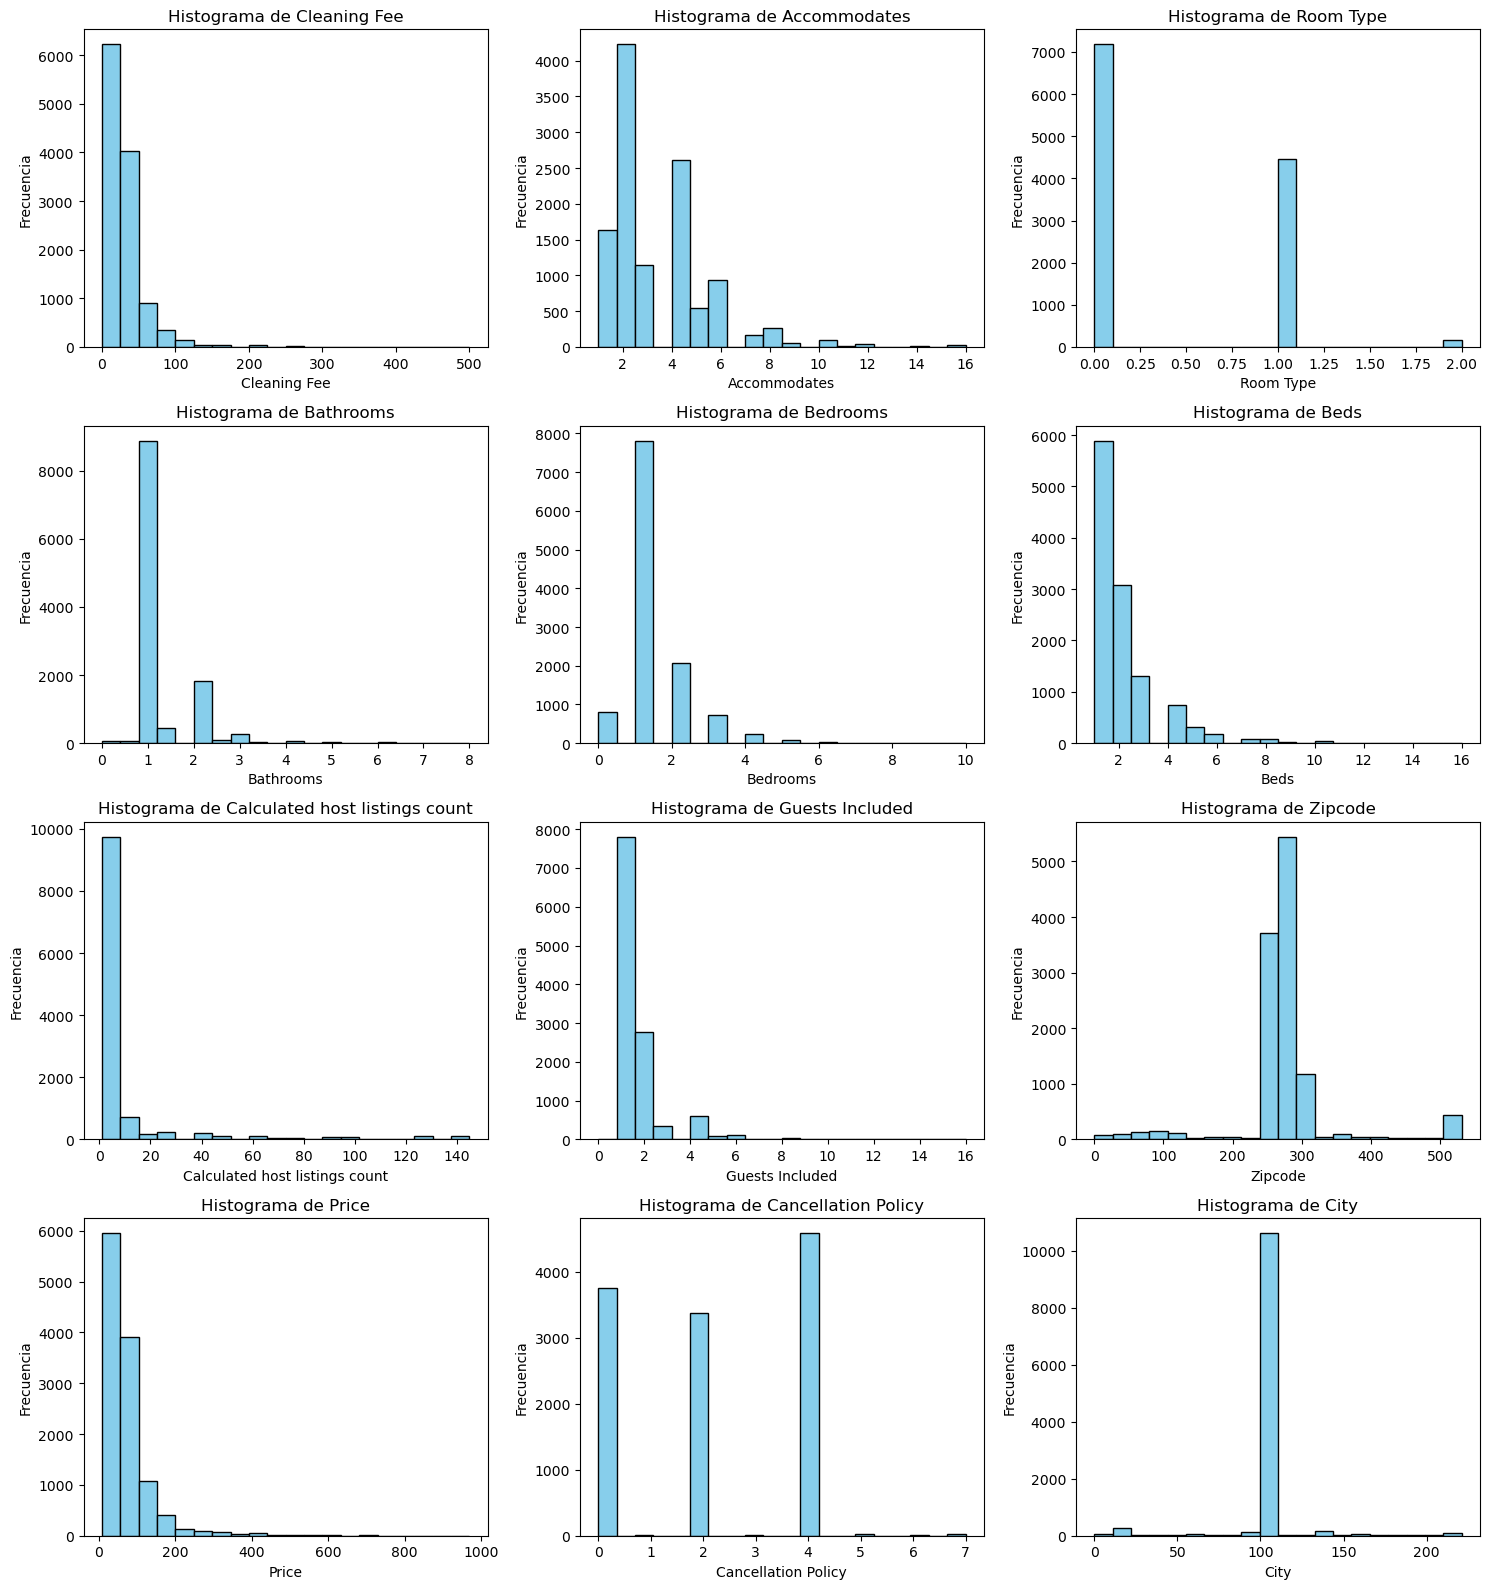

In [ ]:
preprocessing.plot_histograms(df_train)